In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from IPython.display import Image

In [2]:
import pathlib
path1 = "PokemonData" 
data_dir1 = pathlib.Path(path1)

In [3]:
image_count1 = len(list(data_dir1.glob('*/*.png')))
print(image_count1)

121


In [4]:
train_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
data_dir1,
validation_split=0.2,
subset="training",
seed=123,
image_size=(180, 180),
batch_size=30)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir1,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(180, 180),
batch_size=30)

Found 6820 files belonging to 150 classes.
Using 5456 files for training.
Found 6820 files belonging to 150 classes.
Using 1364 files for validation.


In [7]:
class_names1 = train_ds1.class_names
print(class_names1)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

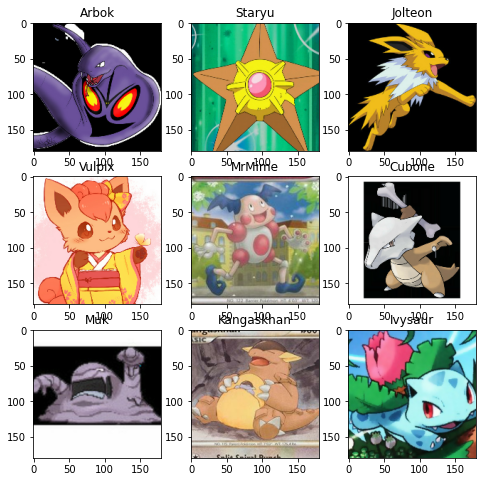

In [8]:
plt.figure(figsize=(8, 8))
for images, labels in train_ds1.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names1[labels[i]])
        plt.axis("on")

In [9]:
normalization_layer1 = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds1 = train_ds1.map(lambda x, y: (normalization_layer1(x), y))
image_batch, labels_batch = next(iter(normalized_ds1))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.07914293 1.0


In [10]:
number_of_classes = 150
model1 = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(number_of_classes)])

In [11]:
model1.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [14]:
epochs = 10 
history1 = model1.fit(train_ds1,
validation_data=val_ds,
epochs=epochs)

Epoch 1/10
182/182 [==============================] - 152s 832ms/step - loss: 4.9576 - accuracy: 0.0105 - val_loss: 4.3381 - val_accuracy: 0.0601
Epoch 2/10
182/182 [==============================] - 149s 810ms/step - loss: 4.0388 - accuracy: 0.1190 - val_loss: 3.5270 - val_accuracy: 0.2001
Epoch 3/10
182/182 [==============================] - 155s 841ms/step - loss: 2.9084 - accuracy: 0.3062 - val_loss: 3.0382 - val_accuracy: 0.2881
Epoch 4/10
182/182 [==============================] - 156s 852ms/step - loss: 1.8580 - accuracy: 0.5301 - val_loss: 2.9723 - val_accuracy: 0.3314
Epoch 5/10
182/182 [==============================] - 149s 812ms/step - loss: 1.1178 - accuracy: 0.7119 - val_loss: 3.3418 - val_accuracy: 0.3460
Epoch 6/10
182/182 [==============================] - 149s 813ms/step - loss: 0.6626 - accuracy: 0.8272 - val_loss: 3.7396 - val_accuracy: 0.3519
Epoch 7/10
182/182 [==============================] - 152s 830ms/step - loss: 0.3584 - accuracy: 0.9057 - val_loss: 4.3457 -

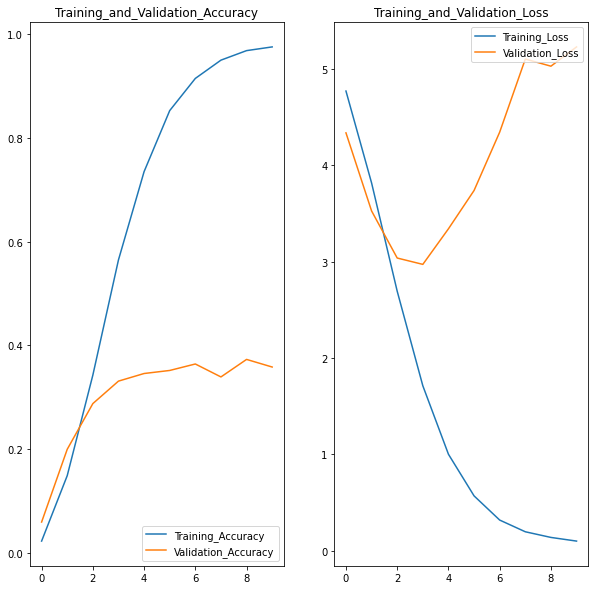

In [19]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range1 = range(epochs)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range1, acc, label='Training_Accuracy')
plt.plot(epochs_range1, val_acc, label='Validation_Accuracy')
plt.legend(loc='lower right')
plt.title('Training_and_Validation_Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range1, loss, label='Training_Loss')
plt.plot(epochs_range1, val_loss, label='Validation_Loss')
plt.legend(loc='upper right')
plt.title('Training_and_Validation_Loss')
plt.show()

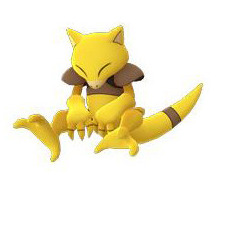

The input image is most likely belongs to Abra with  86.556047 percent perfection.


In [22]:
path = 'PokemonData\\Abra\\b0b6de31451f4e7aa3411fe0963a7f4f.jpg'
img1 = keras.preprocessing.image.load_img(path, target_size=(180, 180)
)
img_array = keras.preprocessing.image.img_to_array(img1)
img_array = tf.expand_dims(img_array, 0)
predictions = model1.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print("The input image is most likely belongs to {} with  {:.6f} percent perfection.".format(class_names1[np.argmax(score)], 
100 * np.max(score)) 
)